## Carga de datos

In [1]:
#Librerías a utilizar 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats as st

In [2]:
#Carga de datos 
df_company = pd.read_csv('moved_project_sql_result_01.csv')
df_chicago = pd.read_csv('moved_project_sql_result_04.csv')
df_loop = pd.read_csv('moved_project_sql_result_07.csv')

## Diagnóstico inicial de datos

In [3]:
#Visualización de datos 
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
df_company.head()

company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

In [5]:
df_company['company_name'].unique()
df_company['company_name'].value_counts().sort_index()
#Revisión de los nombres de las compañías para que no haya duplicados.

company_name
0118 - 42111 Godfrey S.Awir        1
1085 - 72312 N and W Cab Co        1
1469 - 64126 Omar Jada             1
2092 - 61288 Sbeih company         1
2192 - 73487 Zeymane Corp          1
                                  ..
Sun Taxi                           1
Taxi Affiliation Service Yellow    1
Taxi Affiliation Services          1
Top Cab Affiliation                1
Yellow Cab                         1
Name: count, Length: 64, dtype: int64

In [6]:
df_company['trips_amount'].describe() #Visualización de columna númerica.

count       64.000000
mean      2145.484375
std       3812.310186
min          2.000000
25%         20.750000
50%        178.500000
75%       2106.500000
max      19558.000000
Name: trips_amount, dtype: float64

In [7]:
print(df_company['trips_amount'].unique()) #Revisión de algún error con los números.

[19558 11422 10367  9888  9299  9181  8448  7701  7455  5953  5015  4383
  3355  3175  2235  2216  2070  1955  1775  1607  1486  1404  1296  1259
  1014   978   428   402   310   250   230   210   147   146   127    39
    37    36    33    31    29    27    25    21    20    16    15    14
    13    12    11     8     7     5     3     2]


In [8]:
df_chicago.info() #Visualización de los datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [9]:
df_chicago.head()

dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000

In [10]:
df_chicago['dropoff_location_name'].unique()
df_chicago['dropoff_location_name'].value_counts()
#Revisión de los nombres de los barrios no este escritos de distinta forma y se tomen como duplicados.

dropoff_location_name
Loop               1
River North        1
Streeterville      1
West Loop          1
O'Hare             1
                  ..
Mount Greenwood    1
Hegewisch          1
Burnside           1
East Side          1
Riverdale          1
Name: count, Length: 94, dtype: int64

In [11]:
df_chicago['average_trips'].describe()

count       94.000000
mean       599.953728
std       1714.591098
min          1.800000
25%         14.266667
50%         52.016667
75%        298.858333
max      10727.466667
Name: average_trips, dtype: float64

In [12]:
df_loop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [13]:
df_loop.head()

start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0

In [14]:
df_loop['duration_seconds'].describe()

count    1068.000000
mean     2071.731273
std       769.461125
min         0.000000
25%      1438.250000
50%      1980.000000
75%      2580.000000
max      7440.000000
Name: duration_seconds, dtype: float64

In [21]:
df_loop['start_ts'] = pd.to_datetime(df_loop['start_ts']) #Se cambio el tipo de dato de la columna start_ts
print(df_loop.dtypes)

start_ts              datetime64[ns]
weather_conditions            object
duration_seconds             float64
dtype: object


## Análisis Exploratorio de datos

### 10 Principales barrios en terminos de finalización de viaje.

In [15]:
neighborhoods = df_chicago.sort_values(by='average_trips', ascending=False).head(10)
print(neighborhoods)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


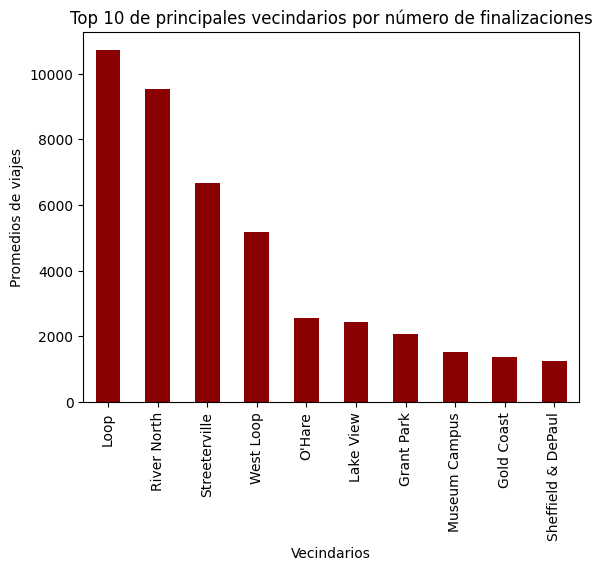

In [16]:
neighborhoods.plot(
    kind='bar',
    x='dropoff_location_name',
    y='average_trips',
    legend=False,
    xlabel='Vecindarios',
    ylabel='Promedios de viajes',
    title='Top 10 de principales vecindarios por número de finalizaciones',
    color='darkred'
    )
plt.show()

CONCLUSIÓN:

Algunas de las razones por las que se puede deber a que estos vecindarios tiene el mayor número de viajes finalizados es porque cuentan con una gran combinación de atracciones por ejemplo;

Loop es un vecindario central de negocios por lo cuál puede generar una gran demanda de viajes en horarios laborales.
River North es conocido por sus bares, restaurantes, antros... esto puede atraer a distitos tipos de personas.

### Empresas de taxis y números de viajes

In [17]:
companies = df_company.sort_values(by='trips_amount', ascending=False)
print(companies)

                                 company_name  trips_amount
0                                   Flash Cab         19558
1                   Taxi Affiliation Services         11422
2                            Medallion Leasin         10367
3                                  Yellow Cab          9888
4             Taxi Affiliation Service Yellow          9299
..                                        ...           ...
59               4053 - 40193 Adwar H. Nikola             7
60                    2733 - 74600 Benny Jona             7
61              5874 - 73628 Sergey Cab Corp.             5
62  2241 - 44667 - Felman Corp, Manuel Alonso             3
63                3556 - 36214 RC Andrews Cab             2

[64 rows x 2 columns]


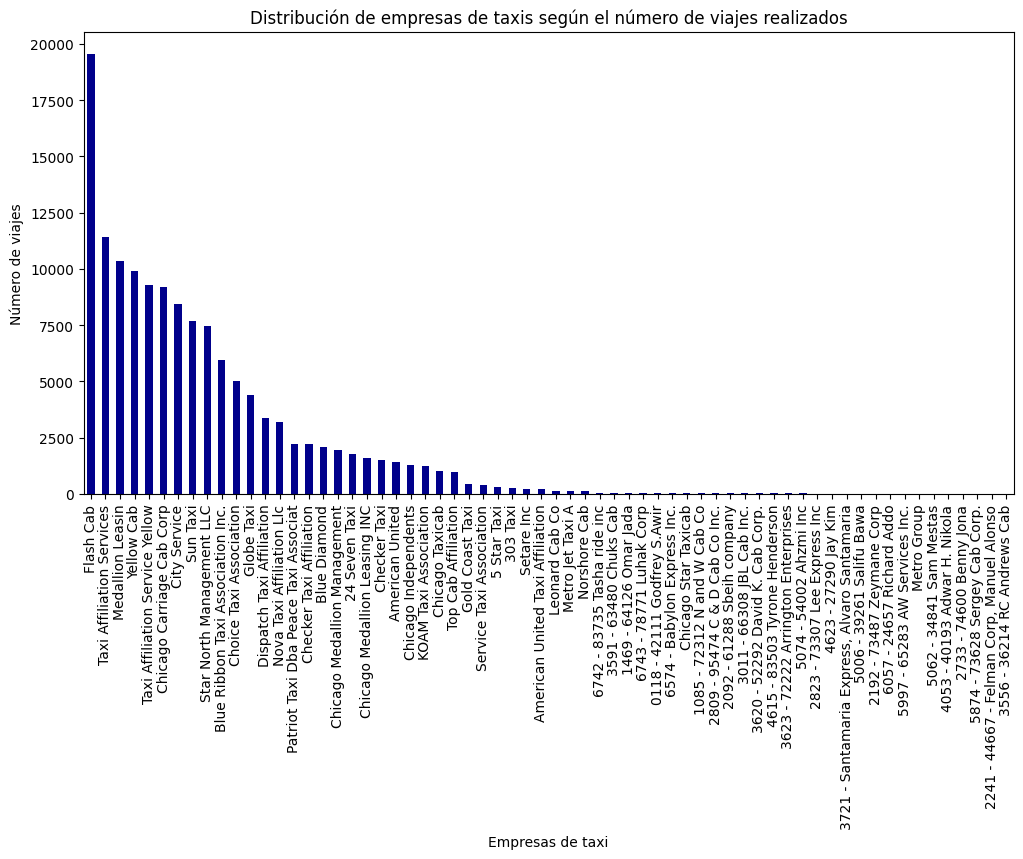

In [18]:
companies.plot(
    kind='bar',
    x='company_name',
    y='trips_amount',
    legend=False,
    xlabel='Empresas de taxi',
    ylabel='Número de viajes',
    title='Distribución de empresas de taxis según el número de viajes realizados',
    color='darkblue',
    figsize=(12, 6)
    )
plt.show()

Conclusión:
Cómo se observa en la gráfica la empresa Flash Cab tiene el mayor número de viajes, posiblemente se deba a que es una empresa reconocidad por ser confiable y segura, lo que genera mayor lealtad entre los clientes.
Probablemente también cuente con mayor disponibilidad de vehículos, ofrezca más promociones o descuentos para incentivar a sus clientes, entre otros.

La gran diferencia entre algunas empresas con el mayor número de viajes y las demás puede deberse a factores regulatorios, económicos, de mercado, entre otros.

## Prueba de hipótesis

La duración promedio de los viajes desde Loop hasta el Aeropuerto   Internacional O'Hare cambia los sábados lluviosos

In [28]:
df_loop['day_of_week'] = df_loop['start_ts'].dt.dayofweek #se uso el atributo dayofweek para volver el día de la semana a número (0:Lunes y 6:Domingo)
df_loop['saturday'] = df_loop['day_of_week'] == 5

rainy_days = df_loop[(df_loop['saturday']) & (df_loop['weather_conditions'] == 'Bad')] #Se filtra los viajes de los sábados en lluviosos y no lluviosos.
days_without_rain = df_loop[(df_loop['saturday']) & (df_loop['weather_conditions'] == 'Good')]

duration_of_rain = rainy_days['duration_seconds'] #Duración de viajes en segundos 
duration_without_rain = rainy_days['duration_seconds']

alpha = 0.05 #Nivel de significación
test = st.ttest_ind(duration_of_rain, duration_without_rain, equal_var=False) #Prueba t de dos muestras independientes.
p_value = test.pvalue #Se obtiene el valor p
print(f"valor_p:{p_value}") 

if p_value < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")



valor_p:1.0
No podemos rechazar la hipótesis nula


Conclusión:


Se estableció el nivel de significación en 0.05 porque para mi criterio, se acepta una probabilidad de error del 5% al rechazar la hipótesis nula.
También se utilizó la prueba t de dos muestras independientes, uno con días lluviosos y otro sin días lluviosos.
Hipótesis nula H0: Se estableció como afirmación que no hay diferencia entre los sábados con lluvia y sin lluvia.
Hipótesis Alternativa H1: Se establece como afirmación de que sí hay diferencia entre los sábados con lluvia y sin lluvia.

De acuerdo con la hipótesis se obtuvo como resultado que no hay evidencia sufuciente para afirmar que la duración promedio de los viajes en sábados con lluvia es diferente.